# Sensitivity Analsysis

We axplore the sensitivity of total radiative flux absorbed by the ocean to:

- pond depth  
- snow depth  
- snow grain size  
- pond tuning parameters
- ice tuning parameters

This web page is rendered from the Jupyter notebook `sensitivity_analysis.ipynb`.

In [1]:
# Append path for package
import sys
sys.path.append("../seaicert/")

In [2]:
import numpy as np

from ccsm3_sir_de import SeaIceRT

#plt.rcParams['text.usetex'] = True

In [3]:
model = SeaIceRT()

## Pond depth sensitivity

The sensitivity of flux absorbed by the ocean to pond depth is explored for a pond depths ranging from 5 cm to 30 cm, and ice thickness from 0.5 m to 3 m.  [_For the moment these are arbitrary pond depths and thickness but represent the observed range... 'ish_]  A 30 cm pond is deep.   

In [4]:
def sensitivity_pond_depth(day_of_year, sea_ice_thickness, pond_depth):
    model.day_of_year = day_of_year
    model.sea_ice_thickness = sea_ice_thickness
    model.snow_depth = 0.
    results = []
    for pndpth in pond_depth:
        model.pond_depth = pndpth
        model.run()
        output = model.get_results()
        results.append(output["downwelling_shortwave_flux_absorbed_by_ocean"] + 
                       output["downwelling_longwave_flux_absorbed_by_ocean"])
    return {
        "sea_ice_thickness": np.full(len(results), sea_ice_thickness),
        "pond_depth": np.array(pond_depth),
        "total_flux_absorbed_by_ocean": np.array(results)
    }   

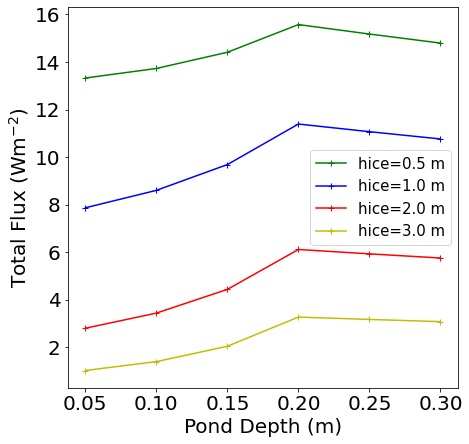

In [15]:
#| label: fig-sensitivity-pond-depth
#| fig-cap: The sensitivity of total flux absorbed by the ocean underneath ice cover to pond depth for a range of ice thicknesses

pond_depth = np.arange(0.05, 0.35, 0.05)
hice_3_0 = sensitivity_pond_depth(200., 3., pond_depth)
hice_2_0 = sensitivity_pond_depth(200., 2., pond_depth)
hice_1_0 = sensitivity_pond_depth(200., 1.0, pond_depth)
hice_0_5 = sensitivity_pond_depth(200., 0.5, pond_depth)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.plot(hice_0_5["pond_depth"], 
        hice_0_5["total_flux_absorbed_by_ocean"], 
        'g-+', 
        label="hice=0.5 m")
ax.plot(hice_1_0["pond_depth"], 
        hice_1_0["total_flux_absorbed_by_ocean"], 
        'b-+', 
        label="hice=1.0 m")
ax.plot(hice_2_0["pond_depth"], 
        hice_2_0["total_flux_absorbed_by_ocean"], 
        'r-+', 
        label="hice=2.0 m")
ax.plot(hice_3_0["pond_depth"], 
        hice_3_0["total_flux_absorbed_by_ocean"], 
        'y-+', 
        label="hice=3.0 m")

ax.set_xlabel("Pond Depth (m)", fontsize=20)
ax.set_ylabel("Total Flux ($\mathrm{Wm^{-2}}$)", fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=15);

## Snow depth sensitivity

In [6]:
def sensitivity_snow_depth(day_of_year, sea_ice_thickness, snow_depth):
    model.day_of_year = day_of_year
    model.sea_ice_thickness = sea_ice_thickness
    model.pond_depth = 0.
    results = []
    for sndpth in snow_depth:
        model.snow_depth = sndpth
        model.run()
        output = model.get_results()
        results.append(output["downwelling_shortwave_flux_absorbed_by_ocean"] + 
                       output["downwelling_longwave_flux_absorbed_by_ocean"])
    return {
        "sea_ice_thickness": np.full(len(results), sea_ice_thickness),
        "snow_depth": np.array(snow_depth),
        "total_flux_absorbed_by_ocean": np.array(results)
    }   

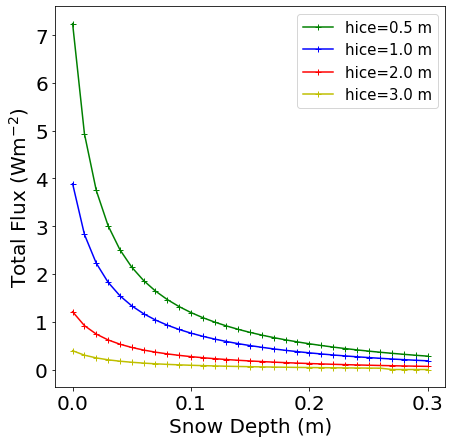

In [13]:
#| label: fig-sensitivity-snow-depth
#| fig-cap: The sensitivity of total flux absorbed by the ocean underneath ice cover to snow depth for a range of ice thicknesses

snow_depth = np.arange(0.0, 0.31, 0.01)
hice_3_0 = sensitivity_snow_depth(200., 3., snow_depth)
hice_2_0 = sensitivity_snow_depth(200., 2., snow_depth)
hice_1_0 = sensitivity_snow_depth(200., 1.0, snow_depth)
hice_0_5 = sensitivity_snow_depth(200., 0.5, snow_depth)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.plot(hice_0_5["snow_depth"], 
        hice_0_5["total_flux_absorbed_by_ocean"], 
        'g-+', 
        label="hice=0.5 m")
ax.plot(hice_1_0["snow_depth"], 
        hice_1_0["total_flux_absorbed_by_ocean"], 
        'b-+', 
        label="hice=1.0 m")
ax.plot(hice_2_0["snow_depth"], 
        hice_2_0["total_flux_absorbed_by_ocean"], 
        'r-+', 
        label="hice=2.0 m")
ax.plot(hice_3_0["snow_depth"], 
        hice_3_0["total_flux_absorbed_by_ocean"], 
        'y-+', 
        label="hice=3.0 m")

ax.set_xlabel("Snow Depth (m)", fontsize=20)
ax.set_ylabel(r"Total Flux ($\mathrm{W m^{-2}}$)", fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=15);

## Sensitivity: snow_grain_radius

In [8]:
def sensitivity_snow_grain_radius(day_of_year, sea_ice_thickness, snow_depth, snow_grain_radius):
    model.day_of_year = day_of_year
    model.sea_ice_thickness = sea_ice_thickness
    model.snow_depth = snow_depth
    model.pond_depth = 0.
    results = []
    for snrad in snow_grain_radius:
        model.snow_grain_radius = snrad
        model.run()
        output = model.get_results()
        results.append(output["downwelling_shortwave_flux_absorbed_by_ocean"] + 
                       output["downwelling_longwave_flux_absorbed_by_ocean"])
    return {
        "sea_ice_thickness": np.full(len(results), sea_ice_thickness),
        "snow_grain_radius": np.array(snow_grain_radius),
        "total_flux_absorbed_by_ocean": np.array(results)
    }   

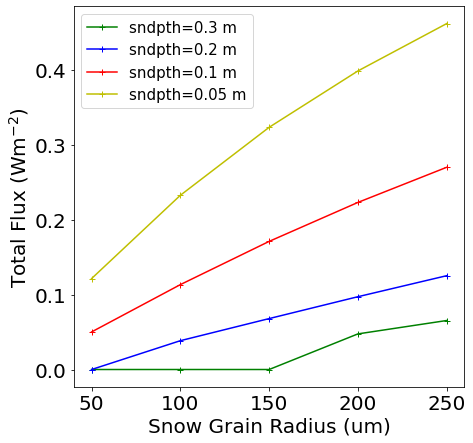

In [16]:
#| label: fig-sensitivity-snow-grain-radius
#| fig-cap: The sensitivity of total flux absorbed by the ocean underneath ice cover to snow grain size for a range of snow depths

snow_grain_radius = np.arange(50., 300., 50.)

sndpth_30 = sensitivity_snow_grain_radius(200., 2., 0.3, snow_grain_radius)
sndpth_20 = sensitivity_snow_grain_radius(200., 2., 0.2, snow_grain_radius)
sndpth_10 = sensitivity_snow_grain_radius(200., 2., 0.1, snow_grain_radius)
sndpth_5 = sensitivity_snow_grain_radius(200., 2., 0.05, snow_grain_radius)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))

ax.plot(sndpth_30["snow_grain_radius"], 
        sndpth_30["total_flux_absorbed_by_ocean"], 
        'g-+', 
        label="sndpth=0.3 m")
ax.plot(sndpth_20["snow_grain_radius"], 
        sndpth_20["total_flux_absorbed_by_ocean"], 
        'b-+', 
        label="sndpth=0.2 m")
ax.plot(sndpth_10["snow_grain_radius"], 
        sndpth_10["total_flux_absorbed_by_ocean"], 
        'r-+', 
        label="sndpth=0.1 m")
ax.plot(sndpth_5["snow_grain_radius"], 
        sndpth_5["total_flux_absorbed_by_ocean"], 
        'y-+', 
        label="sndpth=0.05 m")

ax.set_xlabel("Snow Grain Radius (um)", fontsize=20)
ax.set_ylabel("Total Flux ($\mathrm{Wm^{-2}}$)", fontsize=20)
ax.tick_params(axis='both', labelsize=20)
ax.legend(fontsize=15);

- Snow grain radius will also impact albedo.  
- Look for sensible range for grain size  
- Sensitivity to cloud cover - percentage cover of cloud but also cloud height.  E.g. high cirrus versus low cloud deck.  What are typical clouds in the Arctic?